***ANA500 Alzehmer's Predition***

In [2]:
# Importlibraries
import pandas as pd

In [200]:
# Load the dataset
file_path = 'alzheimers_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [202]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer's Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


***Clean and Prepare Dataset***

In [205]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 

In [207]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer's           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Li

In [209]:
# Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [211]:
# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
Country: ['Spain' 'Argentina' 'South Africa' 'China' 'Sweden' 'South Korea'
 'Germany' 'UK' 'Canada' 'India' 'Italy' 'USA' 'Russia' 'Japan'
 'Australia' 'France' 'Norway' 'Saudi Arabia' 'Mexico' 'Brazil']
Gender: ['Male' 'Female']
Physical Activity Level: ['Medium' 'High' 'Low']
Smoking Status: ['Never' 'Former' 'Current']
Alcohol Consumption: ['Occasionally' 'Never' 'Regularly']
Diabetes: ['No' 'Yes']
Hypertension: ['No' 'Yes']
Cholesterol Level: ['Normal' 'High']
Family History of Alzheimer's: ['No' 'Yes']
Depression Level: ['Low' 'High' 'Medium']
Sleep Quality: ['Poor' 'Good' 'Average']
Dietary Habits: ['Healthy' 'Average' 'Unhealthy']
Air Pollution Exposure: ['High' 'Medium' 'Low']
Employment Status: ['Retired' 'Unemployed' 'Employed']
Marital Status: ['Single' 'Widowed' 'Married']
Genetic Risk Factor (APOE-ε4 allele): ['No' 'Yes']
Social Engagement Level: ['Low' 'High' 'Medium']
Income Level: ['Medium' 'Low' 'High']
Stress Levels: ['High' 'Lo

In [215]:
# Convert binary categorical columns to numerical (0 for 'No', 1 for 'Yes')
binary_columns = ['Diabetes', 'Hypertension', 'Cholesterol Level', 
                  "Family History of Alzheimer's", 'Genetic Risk Factor (APOE-ε4 allele)', 
                  "Alzheimer's Diagnosis", 'Gender']

binary_mapping = {'No': 0, 'Yes': 1, 'Normal': 0, 'High': 1, 'Male': 0, 'Female': 1}

# Apply mapping and convert each column explicitly to integer
for col in binary_columns:
    df[col] = df[col].replace(binary_mapping).astype(int)

In [11]:
# Display summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(df.describe())


Summary Statistics of Numerical Columns:
                Age        Gender  Education Level           BMI  \
count  74283.000000  74283.000000     74283.000000  74283.000000   
mean      71.964703      0.501447         9.487514     26.780639   
std       12.980748      0.500001         5.757020      4.764679   
min       50.000000      0.000000         0.000000     18.500000   
25%       61.000000      0.000000         4.000000     22.700000   
50%       72.000000      1.000000         9.000000     26.800000   
75%       83.000000      1.000000        14.000000     30.900000   
max       94.000000      1.000000        19.000000     35.000000   

           Diabetes  Hypertension  Cholesterol Level  \
count  74283.000000  74283.000000       74283.000000   
mean       0.198646      0.298171           0.300338   
std        0.398983      0.457458           0.458408   
min        0.000000      0.000000           0.000000   
25%        0.000000      0.000000           0.000000   
50%      

In [12]:
# Save cleaned dataset (optional)
df.to_csv("cleaned_alzheimers_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_alzheimers_dataset.csv'")


Cleaned dataset saved as 'cleaned_alzheimers_dataset.csv'


***Visual Analysis***

In [14]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the cleaned dataset
file_path = "cleaned_alzheimers_dataset.csv"  # Ensure you have the cleaned dataset
df = pd.read_csv(file_path)

In [16]:
# Set style for plots
sns.set(style="whitegrid")

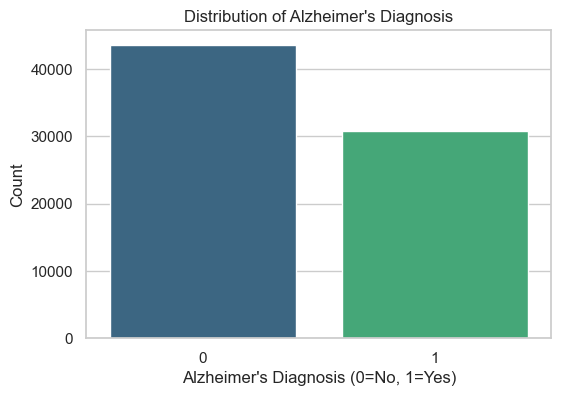

In [17]:
# 1. Bar chart - Alzheimer's Diagnosis distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x="Alzheimer's Diagnosis", data=df, hue="Alzheimer's Diagnosis", palette="viridis", legend=False)
plt.title("Distribution of Alzheimer's Diagnosis")
plt.xlabel("Alzheimer's Diagnosis (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

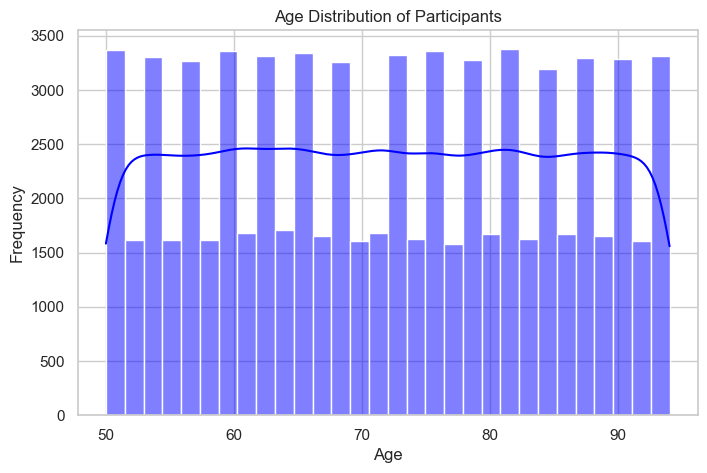

In [18]:
# 2. Histogram - Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


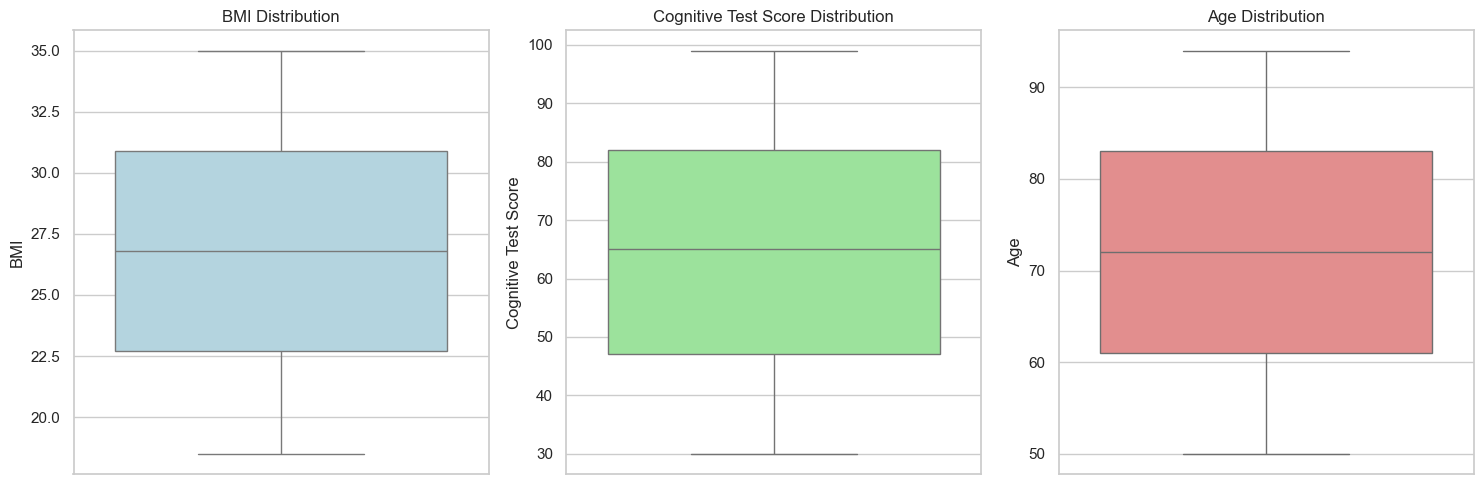

In [19]:
# 3. Boxplots for Outlier Detection in BMI, Cognitive Test Score, and Age
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df["BMI"], ax=axes[0], color="lightblue")
axes[0].set_title("BMI Distribution")

sns.boxplot(y=df["Cognitive Test Score"], ax=axes[1], color="lightgreen")
axes[1].set_title("Cognitive Test Score Distribution")

sns.boxplot(y=df["Age"], ax=axes[2], color="lightcoral")
axes[2].set_title("Age Distribution")

plt.tight_layout()
plt.show()

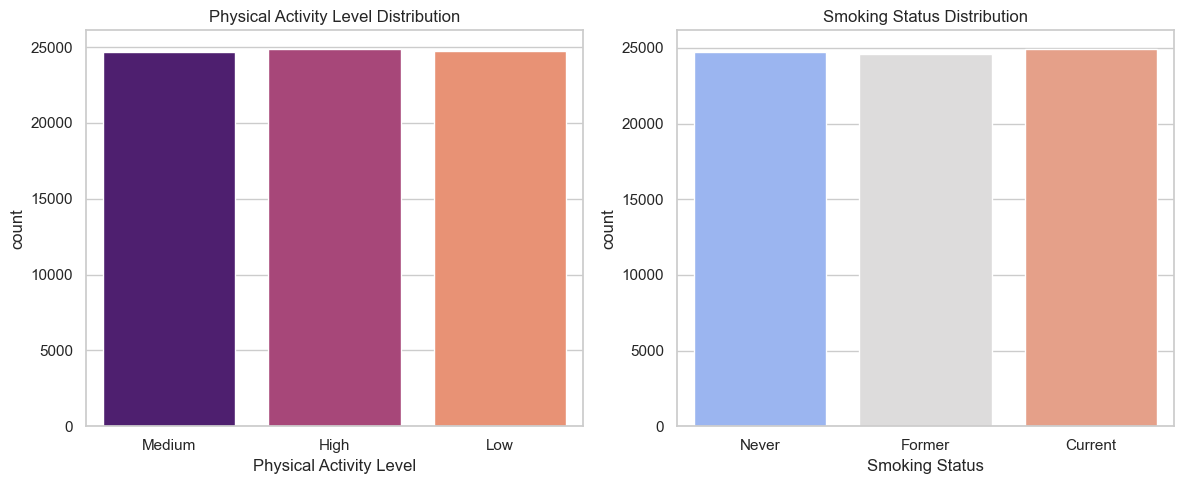

In [20]:
# 4. Bar charts for categorical variables - Physical Activity and Smoking Status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Fix for Physical Activity Level countplot
sns.countplot(x="Physical Activity Level", hue="Physical Activity Level", data=df, ax=axes[0], palette="magma", legend=False)
axes[0].set_title("Physical Activity Level Distribution")

# Fix for Smoking Status countplot
sns.countplot(x="Smoking Status", hue="Smoking Status", data=df, ax=axes[1], palette="coolwarm", legend=False)
axes[1].set_title("Smoking Status Distribution")

plt.tight_layout()
plt.show()

# Machine Learning

***1.Load and Clean the Data.***

In [23]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# Load the dataset
file_path = "alzheimers_prediction_dataset.csv" 
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer's Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [25]:
# Standardize column names (replace spaces with underscores & remove special characters)
df.columns = df.columns.str.replace(" ", "_").str.replace("'", "")

In [26]:
# Check for missing values and drop or fill accordingly
df = df.dropna()  # Drop rows with missing values (Modify strategy if necessary)

In [27]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Country', 'Gender', 'Physical_Activity_Level', 'Smoking_Status',
       'Alcohol_Consumption', 'Diabetes', 'Hypertension', 'Cholesterol_Level',
       'Family_History_of_Alzheimers', 'Depression_Level', 'Sleep_Quality',
       'Dietary_Habits', 'Air_Pollution_Exposure', 'Employment_Status',
       'Marital_Status', 'Genetic_Risk_Factor_(APOE-ε4_allele)',
       'Social_Engagement_Level', 'Income_Level', 'Stress_Levels',
       'Urban_vs_Rural_Living', 'Alzheimers_Diagnosis'],
      dtype='object')


In [28]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders in case needed for decoding

In [29]:
# Display first few rows after encoding
df.head()

,Country,Age,Gender,Education_Level,BMI,Physical_Activity_Level,Smoking_Status,Alcohol_Consumption,Diabetes,Hypertension,...,Dietary_Habits,Air_Pollution_Exposure,Employment_Status,Marital_Status,Genetic_Risk_Factor_(APOE-ε4_allele),Social_Engagement_Level,Income_Level,Stress_Levels,Urban_vs_Rural_Living,Alzheimers_Diagnosis
0,16,90,1,1,33.0,2,2,1,0,0,...,1,0,1,1,0,1,2,0,1,0
1,0,72,1,7,29.9,2,1,0,0,0,...,1,2,2,2,0,0,1,0,1,0
2,14,86,0,19,22.9,0,0,1,0,1,...,0,2,0,1,0,1,2,0,0,0
3,4,53,1,17,31.2,1,2,2,1,0,...,1,2,1,1,0,0,2,1,0,0
4,17,58,0,3,30.0,0,1,0,1,0,...,2,0,0,0,0,1,2,0,0,0


***2. Split Data and Apply Scaling***

In [31]:
# Define the target variable
target_column = "Alzheimers_Diagnosis"  # Ensure this matches the column name in df

In [32]:
# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]


In [33]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Check shapes to confirm successful processing
print("Training Data Shape:", X_train.shape, "Target:", y_train.shape)
print("Testing Data Shape:", X_test.shape, "Target:", y_test.shape)

Training Data Shape: (59426, 24) Target: (59426,)
Testing Data Shape: (14857, 24) Target: (14857,)


***3. Logistic Regression Model***

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      8714
           1       0.67      0.60      0.63      6143

    accuracy                           0.71     14857
   macro avg       0.70      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857



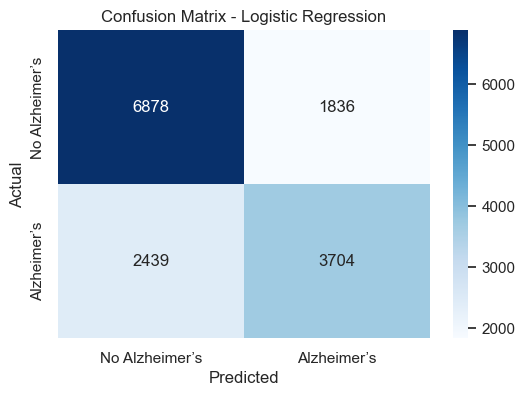

In [37]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

def plot_confusion_matrix(y_true, y_pred, model_name):
    """Generates a confusion matrix heatmap for model evaluation."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Alzheimer’s', 'Alzheimer’s'], yticklabels=['No Alzheimer’s', 'Alzheimer’s'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
# Train Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Print classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

***4. Support Vector Machine (SVM)***

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      8714
           1       0.66      0.64      0.65      6143

    accuracy                           0.72     14857
   macro avg       0.71      0.70      0.71     14857
weighted avg       0.71      0.72      0.72     14857



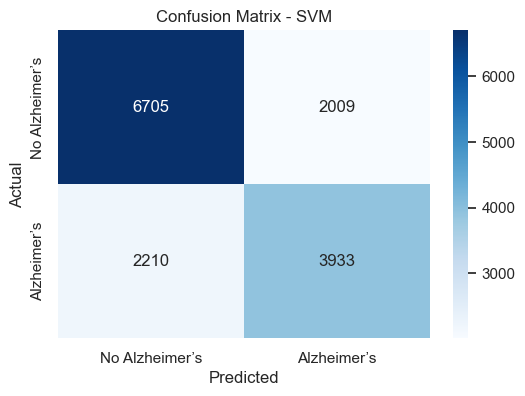

In [39]:
#  Support Vector Machine (SVM)
from sklearn.svm import SVC

# Training on the full data set was taking too long so reduced the training subset
# Train SVM on a smaller subset (e.g., 20% of training data)
X_small, _, y_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42, stratify=y_train)

# Train SVM on the reduced set
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_small, y_small)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Print classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

***5. Random Forest Classifier***

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      8714
           1       0.67      0.65      0.66      6143

    accuracy                           0.72     14857
   macro avg       0.71      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857



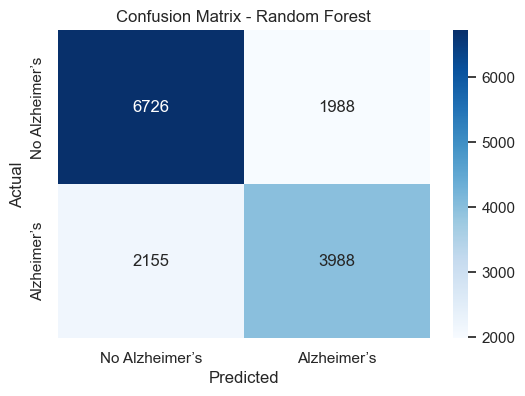

In [41]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Deep Learning Implementation

***Install TensorFlow***

In [44]:
import subprocess
import sys

# Function to install missing packages
def install_and_import(package):
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install necessary packages if missing
install_and_import("tensorflow")
install_and_import("imblearn")  # Required for SMOTE (class balancing)
install_and_import("scikit-learn")  # Required for preprocessing

# Now import modules
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

Installing scikit-learn...


***Data Preprocessing***

In [46]:
# Load dataset
file_path = "alzheimers_prediction_dataset.csv" 
df = pd.read_csv(file_path)

In [47]:
# Standardize column names (replace spaces & remove special characters)
df.columns = df.columns.str.replace(" ", "_").str.replace("'", "")

In [48]:
# Check for missing values
df = df.dropna()  # Drop rows with missing values


In [49]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [50]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for decoding if needed

In [51]:
# Define the target variable
target_column = "Alzheimers_Diagnosis"

In [52]:
# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

In [53]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

***Apply SMOTE***

In [54]:
!pip install --upgrade joblib

In [102]:
# Apply SMOTE for class balancing
from imblearn.over_sampling import SMOTE

# Apply SMOTE for class balancing (without n_jobs)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

***Baseline Fully Connected Nural Network***

In [139]:
# Baseline Fully Connected Nural Network
# Input Necessary Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the updated Neural Network Model
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define input shape
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
nn_eval = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Accuracy: {nn_eval[1]:.4f}")

Epoch 1/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5986 - loss: 0.9561 - val_accuracy: 0.6797 - val_loss: 0.6075
Epoch 2/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6842 - loss: 0.6031 - val_accuracy: 0.6818 - val_loss: 0.5952
Epoch 3/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6962 - loss: 0.5883 - val_accuracy: 0.6858 - val_loss: 0.6025
Epoch 4/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7005 - loss: 0.5826 - val_accuracy: 0.6816 - val_loss: 0.5935
Epoch 5/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7023 - loss: 0.5799 - val_accuracy: 0.6708 - val_loss: 0.6058
Epoch 6/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7042 - loss: 0.5752 - val_accuracy: 0.6894 - val_loss: 0.5882
Epoch 7/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7056 - loss: 0.5729 - val_accuracy: 0.6887 - val_loss: 0.5888
Epoch 8/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7039 - loss: 0.5751 - 

***Recurrent Neural Network (RNN)***

In [141]:
# Recurrent Neural Network (RNN)
# Input Necessary Libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# Convert DataFrames to NumPy arrays before reshaping
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Reshape for RNN (samples, time steps, features)
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# Define RNN Model using `Input()`
rnn_model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # Explicit input shape
    SimpleRNN(64, activation='relu', return_sequences=True),
    SimpleRNN(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile Model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history_rnn = rnn_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluate Model
rnn_eval = rnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"RNN Accuracy: {rnn_eval[1]:.4f}")

Epoch 1/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5884 - loss: 0.6649 - val_accuracy: 0.6745 - val_loss: 0.6044
Epoch 2/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6897 - loss: 0.5948 - val_accuracy: 0.6865 - val_loss: 0.5890
Epoch 3/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7009 - loss: 0.5790 - val_accuracy: 0.6832 - val_loss: 0.5805
Epoch 4/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7050 - loss: 0.5732 - val_accuracy: 0.6746 - val_loss: 0.6052
Epoch 5/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7104 - loss: 0.5694 - val_accuracy: 0.6982 - val_loss: 0.5721
Epoch 6/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7105 - loss: 0.5686 - val_accuracy: 0.7011 - val_loss: 0.5725
Epoch 7/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7131 - loss: 0.5657 - val_accuracy: 0.6776 - val_loss: 0.5831
Epoch 8/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7114 - loss: 0.5

***Long Short-Term Memory (LTSM)***

In [143]:
# Long Short-Term Memory (LTSM)
# Input Necessary Libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Convert DataFrames to NumPy arrays before reshaping
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Reshape for LSTM (samples, time steps, features)
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# Define LSTM Model using `Input()`
lstm_model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # Explicit input shape
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile Model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluate Model
lstm_eval = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"LSTM Accuracy: {lstm_eval[1]:.4f}")

Epoch 1/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.6760 - loss: 0.6140 - val_accuracy: 0.6725 - val_loss: 0.6179
Epoch 2/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.7090 - loss: 0.5807 - val_accuracy: 0.6748 - val_loss: 0.6123
Epoch 3/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.7138 - loss: 0.5698 - val_accuracy: 0.7144 - val_loss: 0.5701
Epoch 4/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7200 - loss: 0.5588 - val_accuracy: 0.7113 - val_loss: 0.5731
Epoch 5/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7212 - loss: 0.5534 - val_accuracy: 0.7018 - val_loss: 0.5766
Epoch 6/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7254 - loss: 0.5494 - val_accuracy: 0.6953 - val_loss: 0.5838
Epoch 7/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7267 - loss: 0.5442 - val_accuracy: 0.7041 - val_loss: 0.5750
Epoch 8/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7298 - 

***Gated Recurrent Unit (GRU)***

In [145]:
# Gated Recurrent Unit (GRU)
# Input Necessary Libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input

# Convert DataFrames to NumPy arrays before reshaping
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Reshape for GRU (samples, time steps, features)
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# Define GRU Model using `Input()`
gru_model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # Explicit input shape
    GRU(64, activation='relu', return_sequences=True),
    GRU(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile Model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history_gru = gru_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluate Model
gru_eval = gru_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"GRU Accuracy: {gru_eval[1]:.4f}")

Epoch 1/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.5653 - loss: 0.6706 - val_accuracy: 0.6773 - val_loss: 0.6309
Epoch 2/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7159 - loss: 0.5659 - val_accuracy: 0.7096 - val_loss: 0.5776
Epoch 3/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.7219 - loss: 0.5510 - val_accuracy: 0.7051 - val_loss: 0.5859
Epoch 4/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7199 - loss: 0.5524 - val_accuracy: 0.7040 - val_loss: 0.5824
Epoch 5/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7275 - loss: 0.5444 - val_accuracy: 0.7013 - val_loss: 0.5721
Epoch 6/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7276 - loss: 0.5385 - val_accuracy: 0.7160 - val_loss: 0.5534
Epoch 7/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7256 - loss: 0.5367 - val_accuracy: 0.7125 - val_loss: 0.5632
Epoch 8/20
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7261 -

# Compare Models Performance

In [147]:
# Store evaluation results
results = {
    "Logistic Regression": 0.71,
    "SVM": 0.72,
    "Random Forest": 0.72,
    "Neural Network (Dense)": nn_eval[1],
    "RNN": rnn_eval[1],
    "LSTM": lstm_eval[1],
    "GRU": gru_eval[1]
}

# Display Results
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.7100
SVM: 0.7200
Random Forest: 0.7200
Neural Network (Dense): 0.6897
RNN: 0.6726
LSTM: 0.7133
GRU: 0.7083


***Plot Training History (Accuracy & Loss)***

In [160]:
# Plot Training History (Accuracy & Loss)
# This function plots the training and validation accuracy/loss of a model over epochs.

# Import necessary libraries

import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    """Plots training and validation accuracy/loss over epochs."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Accuracy
    ax[0].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    ax[0].set_title(f'{model_name} - Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Plot Loss
    ax[1].plot(history.history['loss'], label='Train Loss', color='blue')
    ax[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
    ax[1].set_title(f'{model_name} - Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()

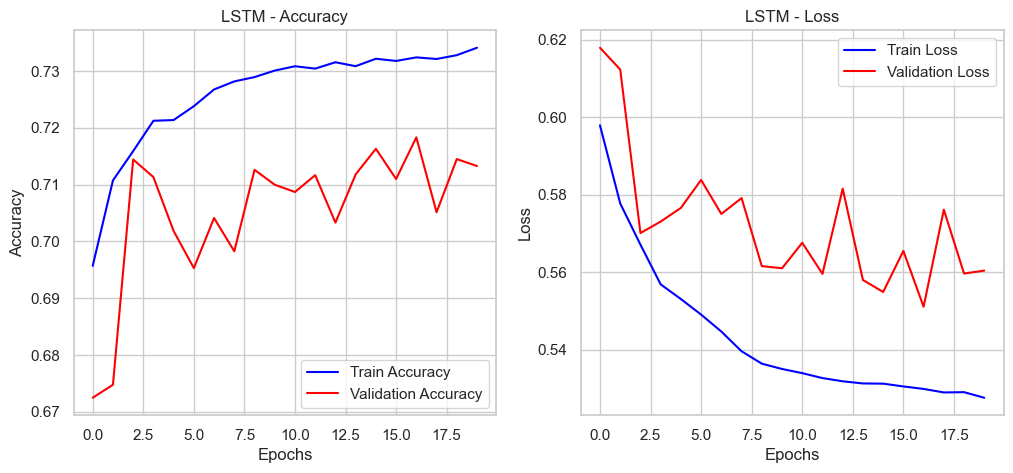

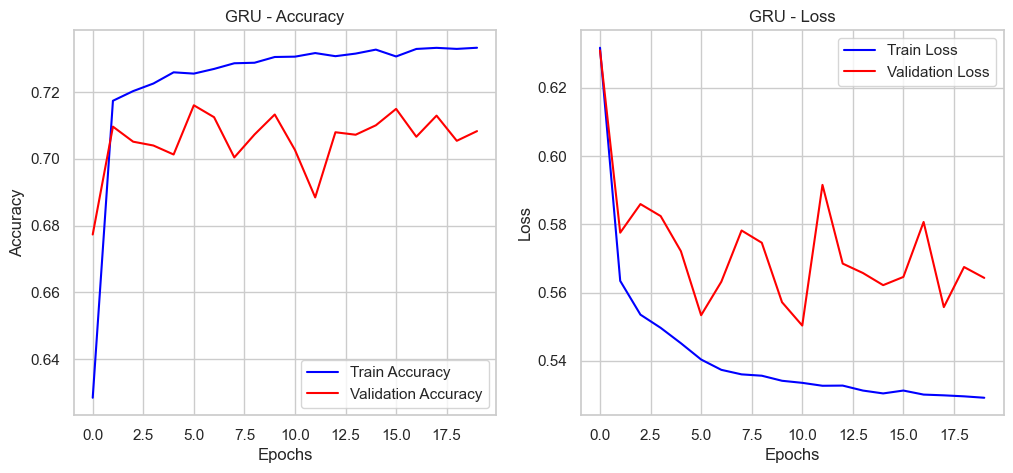

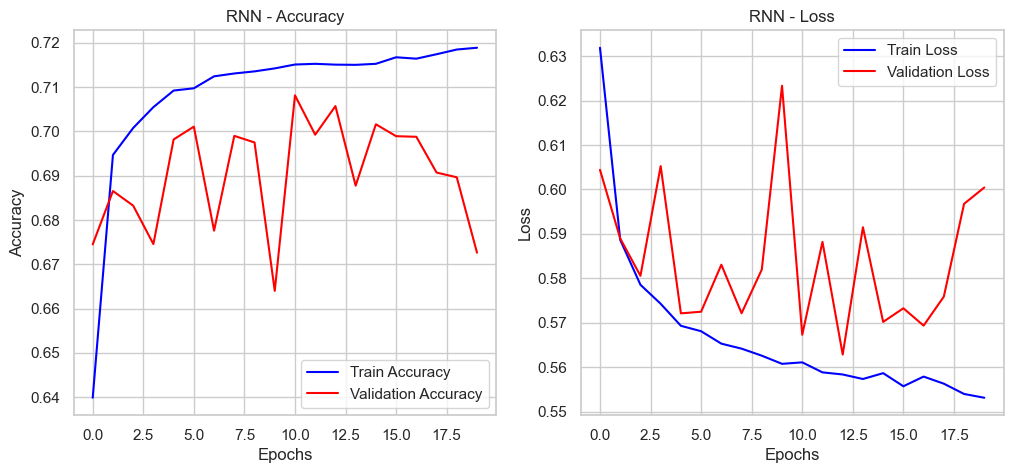

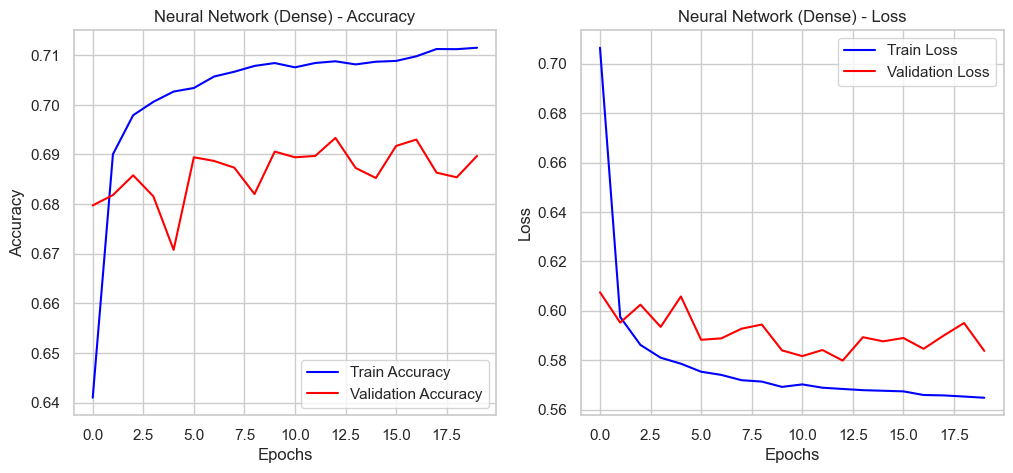

In [164]:
plot_training_history(history_lstm, "LSTM")
plot_training_history(history_gru, "GRU")
plot_training_history(history_rnn, "RNN")
plot_training_history(history, "Neural Network (Dense)")

***Plot Confusion Matrix***

In [186]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    """Generates a confusion matrix heatmap for model evaluation."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Alzheimer’s', 'Alzheimer’s'], yticklabels=['No Alzheimer’s', 'Alzheimer’s'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

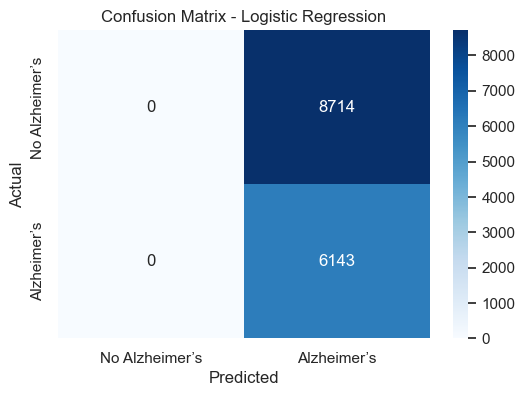

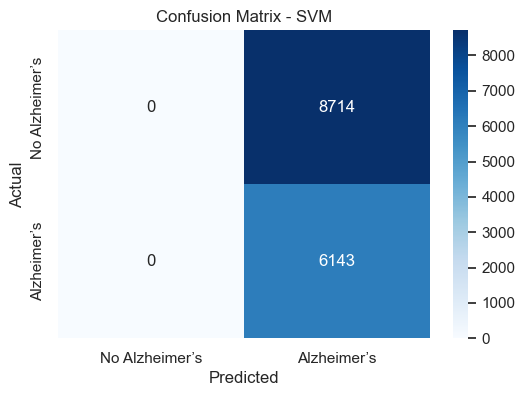

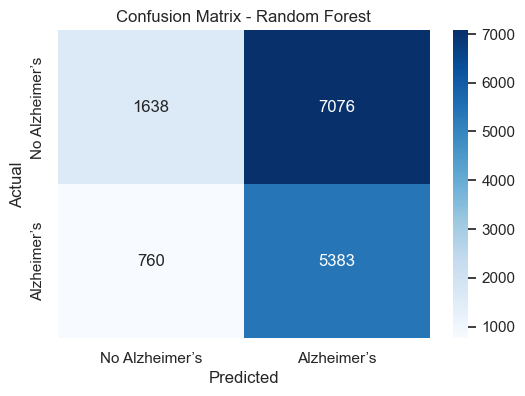

465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


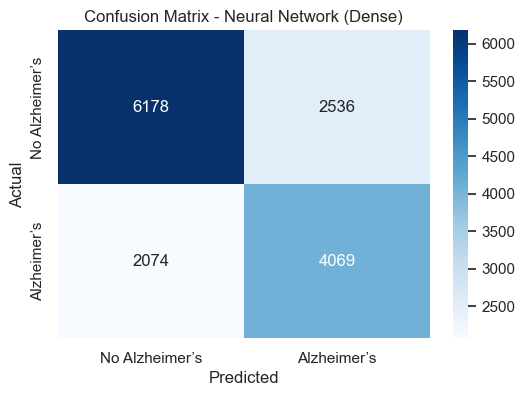

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


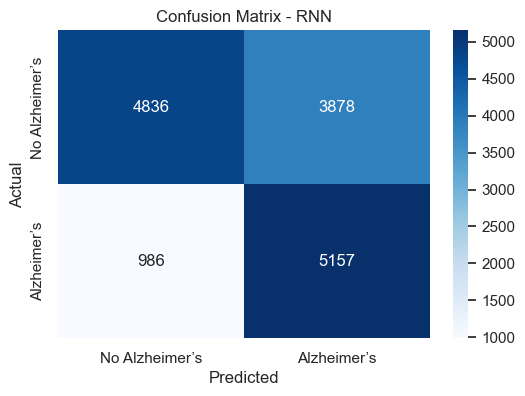

465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


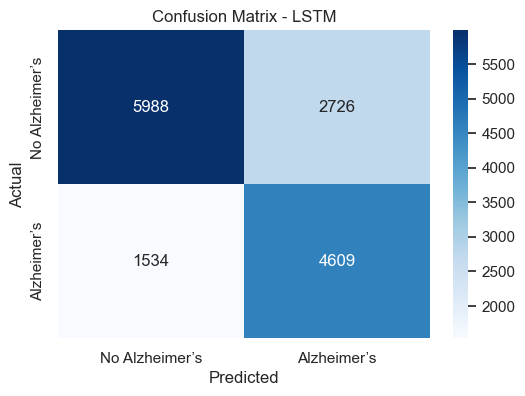

465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


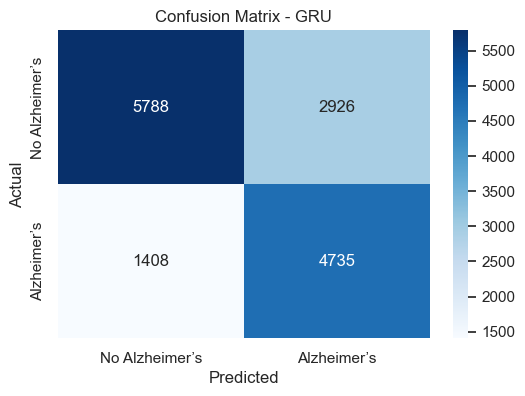

In [190]:
# Show Matrixies 
import numpy as np

# Convert X_test to NumPy array to match training data format
X_test_np = np.array(X_test)

# Logistic Regression
y_pred_log = log_model.predict(X_test_np)
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

# SVM
y_pred_svm = svm_model.predict(X_test_np)
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

# Random Forest
y_pred_rf = rf_model.predict(X_test_np)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Fully Connected Neural Network (Dense)
y_pred_nn = (nn_model.predict(X_test_np) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network (Dense)")

# RNN
y_pred_rnn = (rnn_model.predict(X_test_reshaped) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_rnn, "RNN")

# LSTM
y_pred_lstm = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_lstm, "LSTM")

# GRU
y_pred_gru = (gru_model.predict(X_test_reshaped) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred_gru, "GRU")

***Compare Model Accuracies in a Bar Chart***

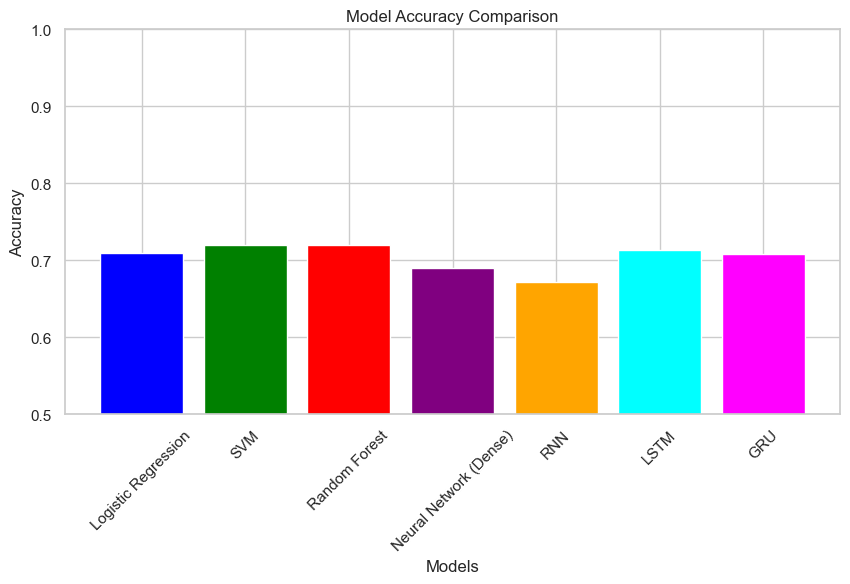

In [192]:
# Compare Model Accuracies in a Bar Chart

# Load necessary libraies
import numpy as np

# Store accuracy results from evaluations
results = {
    "Logistic Regression": 0.71,
    "SVM": 0.72,
    "Random Forest": 0.72,
    "Neural Network (Dense)": nn_eval[1],
    "RNN": rnn_eval[1],
    "LSTM": lstm_eval[1],
    "GRU": gru_eval[1]
}

# Plot the accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)  # Set a range for better visualization
plt.xticks(rotation=45)
plt.show()
